In [1]:
import pandas as pd
import openpyxl
import xlsxwriter
import numpy as np
import pdb
from dateutil.relativedelta import *
import glob
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
balance_sheet_df  = pd.DataFrame()
profit_loss_df = pd.DataFrame()
cash_flow_df = pd.DataFrame()

company_name = "Kiri Indus.xlsx"
xl = pd.ExcelFile('../../finance_vicky/files/input/company_details/'+company_name)
if 'Profit & Loss' in xl.sheet_names:
    profit_loss_df = xl.parse('Profit & Loss', skiprows=2)
if 'Balance Sheet' in xl.sheet_names:
    balance_sheet_df = xl.parse('Balance Sheet', skiprows=2)
if 'Cash Flow' in xl.sheet_names:
    cash_flow_df = xl.parse('Cash Flow', skiprows=2)

In [3]:
profit_loss_df.set_index('Narration', inplace=True)
profit_loss_df.columns = pd.to_datetime(profit_loss_df.columns)
print(profit_loss_df.head())
#profit_loss_df.drop(['RATIOS:', 'Dividend Payout', 'OPM', 'TRENDS:',
#'Sales Growth', 'OPM', 'Price to Earning'], axis=0, inplace = True)
t_profit_loss_df = profit_loss_df.T


                  2009-03-31  2010-03-31  2011-03-31  2012-03-31  2013-03-31  \
Narration                                                                      
Sales                 278.49      340.85      572.42      534.54      524.61   
Expenses              250.77      280.91      475.62      471.75      603.07   
Operating Profit       27.72       59.94       96.80       62.79      -78.46   
Other Income            4.15        7.09        4.16        2.50        1.42   
Depreciation            3.34       11.72       18.62       30.26       31.98   

                  2014-03-31  2015-03-31  2016-03-31  2017-03-31  2018-03-31  
Narration                                                                     
Sales                 583.27      780.29      889.04      964.83      884.20  
Expenses              550.73      711.65      801.72      837.27      754.03  
Operating Profit       32.54       68.64       87.32      127.56      130.17  
Other Income            0.57        2.30    

In [4]:
t_profit_loss_df.columns.name = 'Narration'
t_profit_loss_df.index.name = 'Date'
t_profit_loss_df['% Sales Growth'] = t_profit_loss_df['Sales'].pct_change()*100
t_profit_loss_df['% Operating Profit Growth'] = t_profit_loss_df['Operating Profit'].pct_change()*100
melted_df = pd.melt(t_profit_loss_df.reset_index(), id_vars=t_profit_loss_df.index.name, value_vars=list(t_profit_loss_df.columns))
melted_df['Date'] = melted_df['Date'].map(lambda x: x.year)

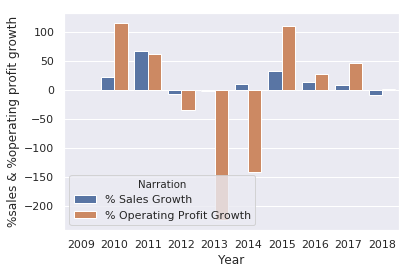

In [6]:
sn.set()
fig_growth = sn.barplot(data=melted_df, x='Date', y='value', hue='Narration', hue_order=['% Sales Growth','% Operating Profit Growth'])
plt.xlabel('Year')
plt.ylabel('%sales & %operating profit growth')
plt.show(fig_growth)
#fig.save

Index([        'Narration', 2009-03-31 00:00:00, 2010-03-31 00:00:00,
       2011-03-31 00:00:00, 2012-03-31 00:00:00, 2013-03-31 00:00:00,
       2014-03-31 00:00:00, 2015-03-31 00:00:00, 2016-03-31 00:00:00,
       2017-03-31 00:00:00, 2018-03-31 00:00:00],
      dtype='object')